### Exploring the Used Car Market in Saudi Arabia and Predicting Car Prices

#### Objectives :
- Perform Exploratory Data Analysis to uncover trends and patterns in the used car market in Saudi Arabia.
- Build a predictive model to estimate car prices based on key features like mileage, engine size, and year.

In [498]:
# Import important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [499]:
# reading our dataset 
df = pd.read_csv('UsedCarsSA_EN.csv')

## 1. Data Preparation

In [501]:
# Check the condition of the dataset
print(df.shape)

(8035, 13)


In [502]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False


### Identify the Variables of the dataset and trying to get the description of each field :
- Make: The car manufacturer.
- Type: Model or type of the car.
- Year: Manufacturing year.
- Origin: Country of origin.
- Color: Color of the car.
- Options: Feature level (e.g., Full, Standard, Semi Full).
- Engine_Size: Engine capacity in liters.
- Fuel_Type: Type of fuel (e.g., Gas, Diesel).
- Gear_Type: Transmission type (e.g., Automatic, Manual).
- Mileage: Distance the car has traveled (in km).
- Region: Region where the car is being sold.
- Price: Selling price.
- Negotiable: Whether the price is negotiable or not.

In [504]:
# We will now start cleaning the data, first checking if there is a duplicates.
sumDup=df.duplicated()
sum(sumDup)

3

In [505]:
# it appears that we have 3 duplicates

In [506]:
df_cars=df.drop_duplicates()
sumDup=df_cars.duplicated()
sum(sumDup)

0

In [507]:
# checking null value in the dataset 
df_null= df_cars.isnull().sum()
df_null

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [508]:
# Now as we see before that the price have zero value in the head, we want to remove all zero values.
price_zero = df_cars[df_cars['Price'] == 0]
price_zero

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0,True
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0,True
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0,True
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0,True
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0,True
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0,True


In [509]:
# there is 2526 zero value in price, so we just drop it
df = df_cars[df_cars['Price'] != 0]

# Check the number of rows that cleaned
zero_removed = len(df) - len(df_cars)

print("Number of rows removed: ",zero_removed)

Number of rows removed:  -2526


In [510]:
df.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000,False
11,Nissan,Patrol,2014,Saudi,White,Full,5.6,Gas,Automatic,106000,Dammam,135000,False


In [511]:
# further check from highest price to lowest
data_sorted = df.sort_values(by='Price', ascending=True)
data_sorted.head(25)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1,False
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500,False
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850,False
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877,False
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884,False
7233,Toyota,Yaris,2019,Saudi,White,Standard,1.6,Gas,Automatic,85000,Najran,950,False
1661,MG,5,2020,Saudi,White,Standard,1.5,Gas,Automatic,41000,Al-Ahsa,988,False
7665,Hyundai,Elantra,2019,Saudi,Grey,Standard,2.0,Gas,Automatic,89000,Jeddah,993,False
3009,GMC,Yukon,2021,Saudi,Another Color,Standard,5.3,Gas,Automatic,4000,Jeddah,1000,False
4277,Toyota,Corolla,2020,Saudi,Silver,Standard,1.6,Gas,Automatic,48563,Hail,1002,False


In [512]:
# great,now we want to see the uesfulness of "Negotiable" column because before we cleaned the values, it gave us "True" only in zero values in price column
true_non_zero = df[(df['Negotiable'] == True) & (df['Price'] != 0)]
print(len(true_non_zero))

0


In [513]:
# so there is no use for the column as there is no value other than zero to gave us true, so we drop it
df_cars=df.drop(columns=['Negotiable'])

In [514]:
df_cars.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000


In [515]:
# Let us do some validation on the dataset and check 
df_cars.describe()

,Year,Engine_Size,Mileage,Price
count,"5,506.0","5,506.0","5,506.0","5,506.0"
mean,"2,014.8",3.2,"139,379.9","78,334.9"
std,5.1,1.5,"334,933.0","75,041.5"
min,"1,963.0",1.0,100.0,1.0
25%,"2,013.0",2.0,"46,000.0","35,000.0"
50%,"2,016.0",2.7,"101,000.0","58,000.0"
75%,"2,018.0",4.0,"180,000.0","95,000.0"
max,"2,021.0",9.0,"20,000,000.0","1,150,000.0"


In [516]:
# the format is not good with scientific notation lets change it 
pd.set_option('display.float_format', '{:,.1f}'.format)
df_cars.describe()

,Year,Engine_Size,Mileage,Price
count,"5,506.0","5,506.0","5,506.0","5,506.0"
mean,"2,014.8",3.2,"139,379.9","78,334.9"
std,5.1,1.5,"334,933.0","75,041.5"
min,"1,963.0",1.0,100.0,1.0
25%,"2,013.0",2.0,"46,000.0","35,000.0"
50%,"2,016.0",2.7,"101,000.0","58,000.0"
75%,"2,018.0",4.0,"180,000.0","95,000.0"
max,"2,021.0",9.0,"20,000,000.0","1,150,000.0"


### first look:
- The max value of Mileage is unrealistic as it is 20,000,000 and the std is very high, we will deal with it later, like limiting it to 600000km
- the price seem resonable but we have to look for a normal value like above 7000, there is no benefit to consider a one riyal car
- Year are in realistic range as it is from 1963 to 2021
- the engine size is relistic at first glance as well from 1L to 9L

In [518]:
# check the number of cars below 7000 riyal
low_price_cars = df_cars[df_cars['Price'] < 7000]
print(f"Number of cars priced below 7000 Riyal: {len(low_price_cars)}")

Number of cars priced below 7000 Riyal: 112


In [519]:
low_price_cars.describe()


,Year,Engine_Size,Mileage,Price
count,112.0,112.0,112.0,112.0
mean,"2,015.3",2.9,"112,187.7","2,379.8"
std,8.0,1.4,"220,693.8","1,582.9"
min,"1,986.0",1.0,100.0,1.0
25%,"2,016.0",2.0,"21,230.0","1,307.5"
50%,"2,019.0",2.5,"49,500.0","1,711.5"
75%,"2,020.0",3.6,"111,250.0","2,730.0"
max,"2,021.0",6.0,"2,000,000.0","6,500.0"


In [520]:
# they tend to have the high mileage as the min is one riyal all these point aim that the info is unrealistic so droping it is better

df_cars_cleaned = df_cars[df_cars['Price'] >= 7000]
# Confirm the new dataset size
df_cars_cleaned = df_cars[df_cars['Mileage'] <=600_000]
print(f"Number of cars remaining after filtering: {len(df_cars_cleaned)}")

Number of cars remaining after filtering: 5473


In [521]:
df_cars=df_cars_cleaned

In [522]:
df_cars.head(12)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000
11,Nissan,Patrol,2014,Saudi,White,Full,5.6,Gas,Automatic,106000,Dammam,135000


#### let us clean the index to have a better view at the data

In [524]:
df_cars.reset_index(drop=True, inplace=True)
df_cars.head(12)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
1,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
2,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
3,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
4,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000
5,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000
6,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000
7,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000
8,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000
9,Nissan,Patrol,2014,Saudi,White,Full,5.6,Gas,Automatic,106000,Dammam,135000


In [525]:
df_cars.describe()

,Year,Engine_Size,Mileage,Price
count,"5,473.0","5,473.0","5,473.0","5,473.0"
mean,"2,014.9",3.2,"124,788.8","78,612.8"
std,5.1,1.5,"106,698.1","75,142.5"
min,"1,963.0",1.0,100.0,1.0
25%,"2,013.0",2.0,"46,000.0","35,000.0"
50%,"2,016.0",2.7,"100,000.0","58,000.0"
75%,"2,018.0",4.0,"180,000.0","95,000.0"
max,"2,021.0",9.0,"600,000.0","1,150,000.0"


## 2.Exploritory Data Analysis 

#### Questions want to address before EDA :
- Do specific brands or models command higher prices? 
- What is the distribution of mileage in the dataset? 
- Which regions have the highest and lowest average car prices? 
- Are there outliers in Mileage? 
- Do certain Fuel_Type categories correlate with higher prices? 
- How do manual and automatic transmissions impact car prices? 
- Does the level of options (e.g., Full, Standard) affect car prices? 

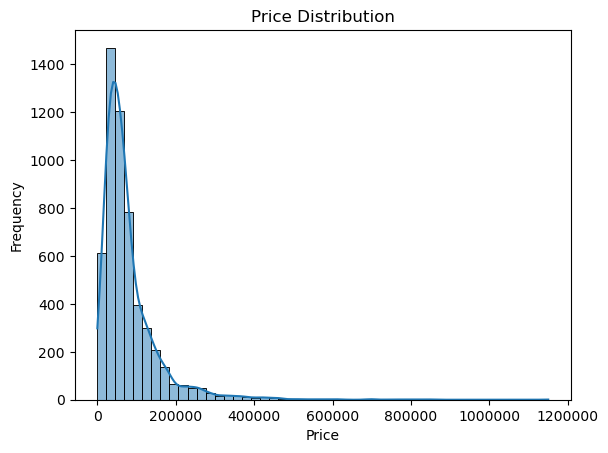

In [528]:
sns.histplot(df_cars['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.show()

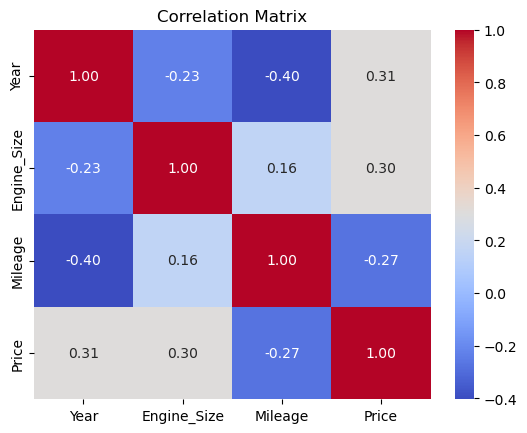

In [529]:
numeric_cols = df_cars.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 0, 'Engine Size')

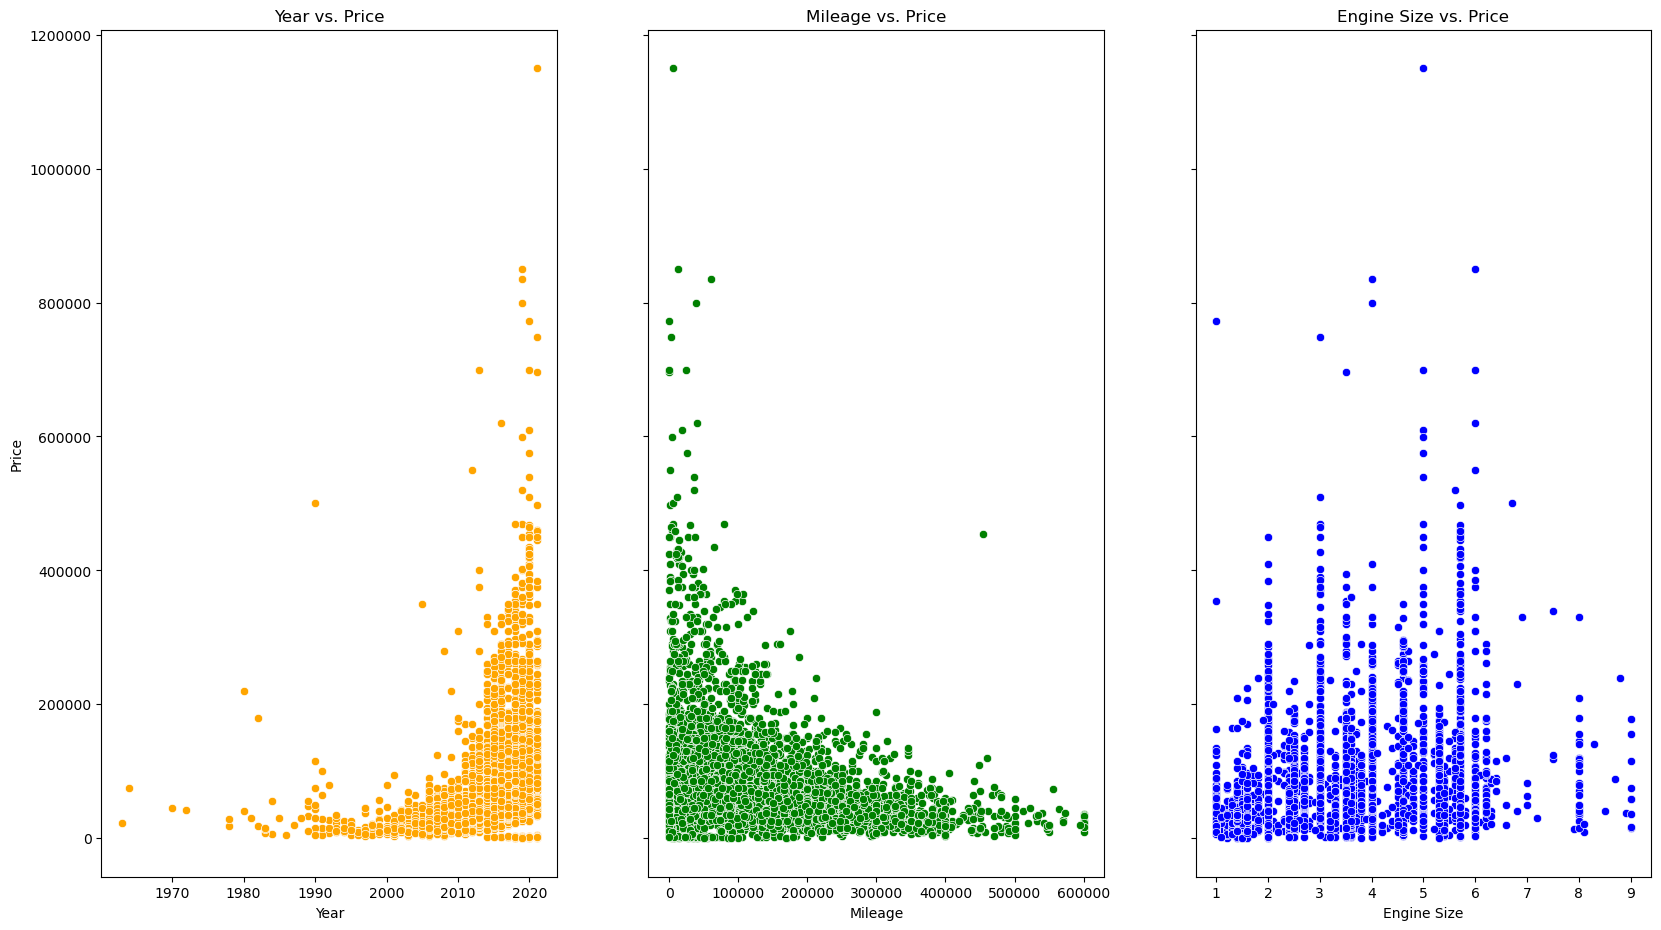

In [530]:
fig, axes = plt.subplots(1, 3, figsize=(20, 11), sharey=True)

# Scatterplot: Year vs. Price
sns.scatterplot(x='Year', y='Price', data=df_cars, ax=axes[0], color='orange')
axes[0].set_title('Year vs. Price')
axes[0].set_xlabel('Year')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')


# Scatterplot: Mileage vs. Price
sns.scatterplot(x='Mileage', y='Price', data=df_cars, ax=axes[1], color='green')
axes[1].set_title('Mileage vs. Price')
axes[1].set_xlabel('Mileage')


# Scatterplot: Engine Size vs. Price
sns.scatterplot(x='Engine_Size', y='Price', data=df_cars, ax=axes[2], color='blue')
axes[2].set_title('Engine Size vs. Price')
axes[2].set_xlabel('Engine Size')

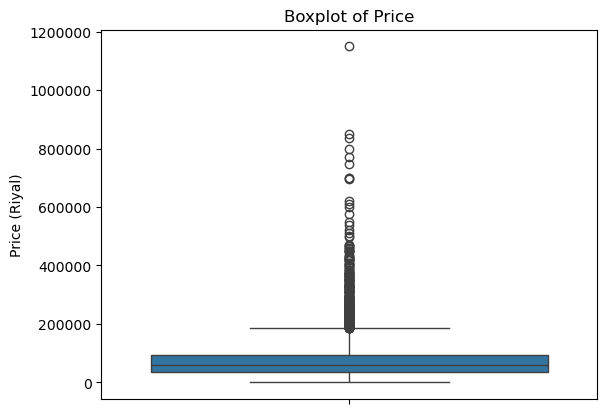

In [531]:
sns.boxplot(y=df_cars['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price (Riyal)')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

### Insights :
- The distribution of car prices is right-skewed, with most cars priced below 200,000 Riyal.
- A small number of cars are priced above 1 million Riyal, likely representing luxury or rare models.
- There is a positive relationship between Year and Price (correlation = 0.30).
- Newer cars are generally priced higher, while older cars see significant depreciation.
- There is a negative correlation between Mileage and Price (-0.27).
- Cars with higher mileage tend to have lower prices, indicating depreciation from wear and tear.
- Engine size is an indicator of vehicle category, with larger engines reflecting premium or high-performance models.
- Older cars and high-mileage vehicles with high prices likely represent vintage or specialty cars.

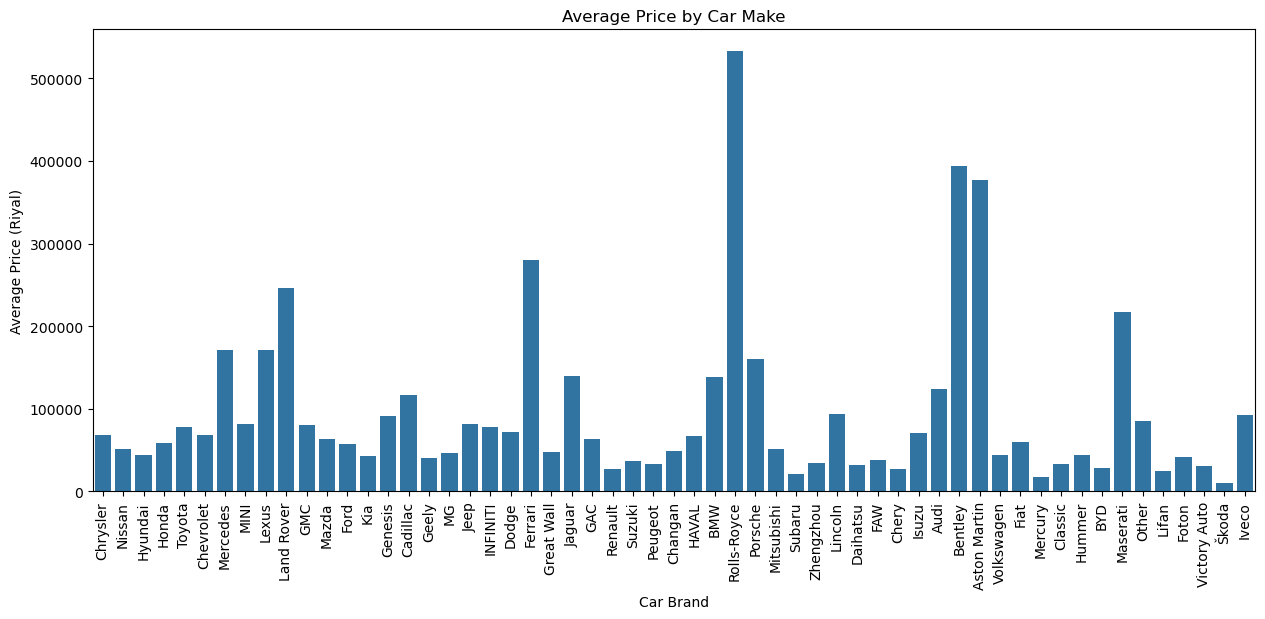

In [533]:
## investigating brands 
plt.figure(figsize=(15, 6))
sns.barplot(x='Make', y='Price', data=df_cars, estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Price by Car Make')
plt.xlabel('Car Brand')
plt.ylabel('Average Price (Riyal)')
plt.show()

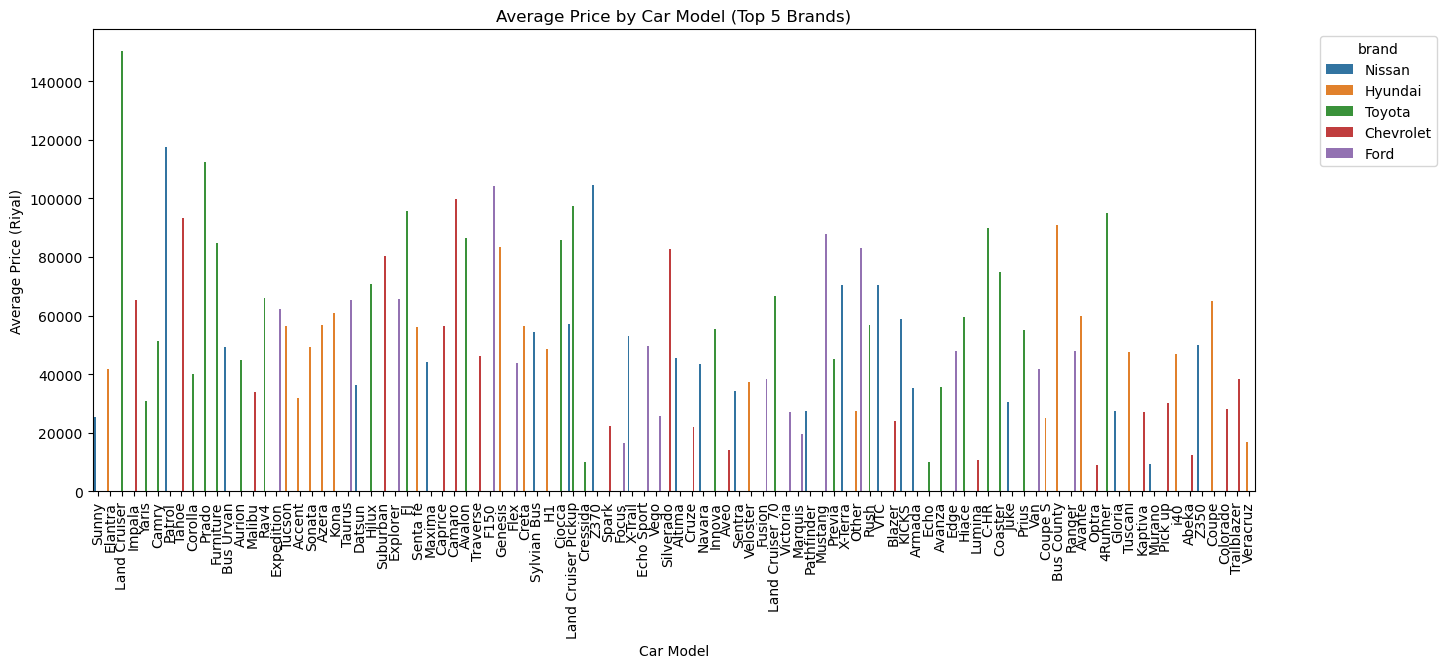

In [534]:
top_brands = df_cars['Make'].value_counts().head(5).index

# Filter the dataset for only the top brands
df_top_brands = df_cars[df_cars['Make'].isin(top_brands)]


plt.figure(figsize=(15, 6))
sns.barplot(x='Type', y='Price', hue='Make', data=df_top_brands, errorbar=None, estimator='mean')
plt.xticks(rotation=90)
plt.title('Average Price by Car Model (Top 5 Brands)')
plt.xlabel('Car Model')
plt.ylabel('Average Price (Riyal)')
plt.legend(title='brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights :
- Rolls-Royce and Ferrari have the highest average prices, exceeding 600,000 Riyal.
- Brands like Toyota, Hyundai, and Nissan have relatively lower average prices, reflecting their dominance in the affordable and mid-range markets.
- Brands like Mercedes and Land Rover have a mid-to-high price range, indicating their focus on luxury and performance-oriented vehicles.
- Models like Land Cruiser and Prado are among the highest-priced within Toyota’s lineup, reflecting their premium nature.
- Variability in models like CLA and GLC shows price diversity within the brand
- Brands like Hyundai and Nissan have most of their models clustered in the lower price ranges, catering to the mass market.

In [536]:
# 
region_price_stats = df_cars.groupby('Region')['Price'].agg(['mean', 'median', 'count']).reset_index()

# Sort by average price
region_price_stats = region_price_stats.sort_values(by='mean', ascending=False)

# Display the regional statistics
print(region_price_stats)

            Region     mean   median  count
9           Dammam 93,714.6 68,000.0   1117
20          Riyadh 81,343.1 60,000.0   2289
22          Sakaka 80,000.0 75,000.0      4
13          Jeddah 75,609.1 55,000.0    780
18          Qassim 74,237.3 60,000.0    160
15          Khobar 73,245.4 50,000.0     63
16          Makkah 67,692.3 40,000.0    133
7            Aseer 67,387.6 57,000.0    128
1          Al-Ahsa 66,956.0 52,000.0    157
6             Arar 64,660.3 35,500.0     13
3          Al-Jouf 61,045.8 36,000.0     18
24            Taef 60,666.0 38,000.0     68
12           Jazan 59,592.7 45,000.0     53
25    Wadi Dawasir 57,800.0 50,000.0      5
4        Al-Medina 57,383.9 45,000.0    171
2          Al-Baha 56,375.0 49,000.0     24
19        Qurayyat 55,800.0 60,000.0      5
0             Abha 55,562.8 46,000.0     40
10  Hafar Al-Batin 55,512.8 45,500.0     28
11            Hail 54,418.9 55,000.0     32
26           Yanbu 53,900.0 40,500.0     20
17          Najran 53,271.9 30,0

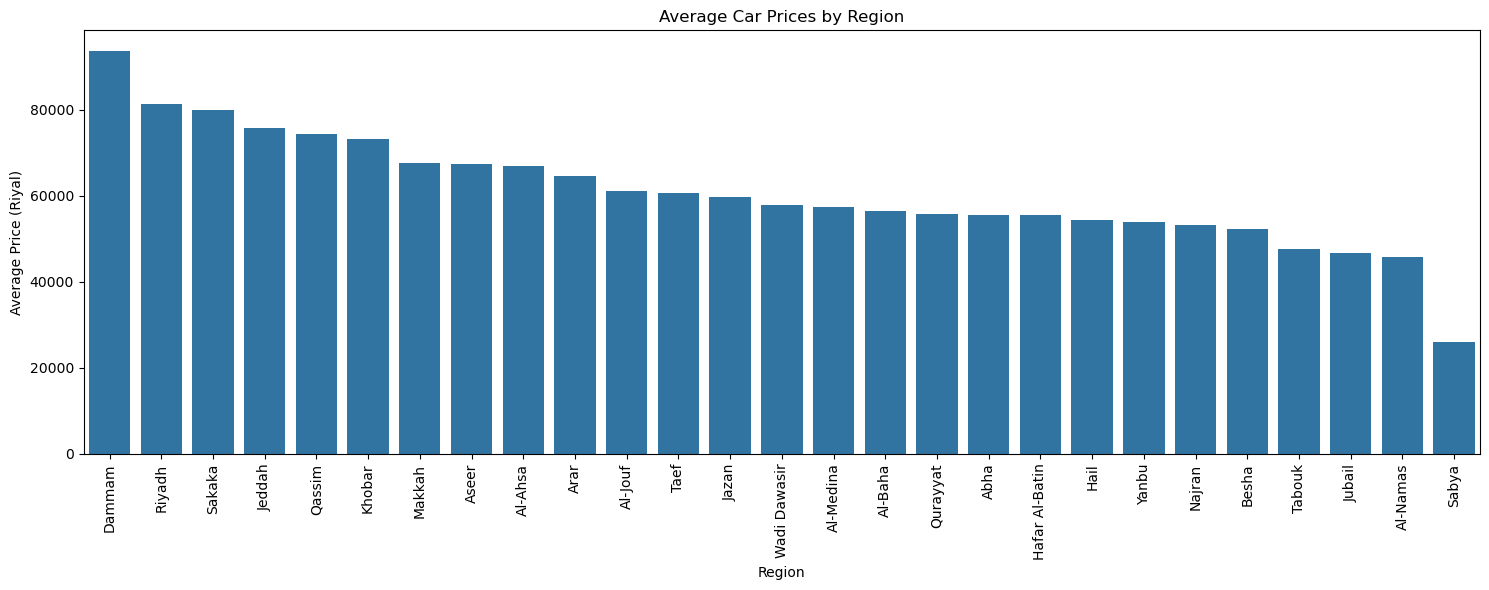

In [537]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='mean', data=region_price_stats)
plt.xticks(rotation=90)
plt.title('Average Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Price (Riyal)')
plt.tight_layout()
plt.show()

### Insights :
- Wadi Dawasir has the highest average price (147,000 Riyal), but it only has 1 listing, making it less representative of general trends.
- Dammam (136,725 Riyal) and Sakaka (120,000 Riyal) also show high averages, with Dammam having a substantial number of listings (377), which adds credibility to its higher pricing.
- Riyadh (104,173 Riyal) and Jeddah (93,566 Riyal) have a high number of listings (895 and 357, respectively), showcasing competitive markets with diverse price ranges.
- Makkah, despite being a prominent city, has moderate average prices compared to Riyadh and Jeddah.
- Regions with a higher count of listings tend to have more stable and representative average prices (e.g., Riyadh, Jeddah, Dammam). 
- Regions with only a few listings (e.g., Wadi Dawasir, Sakaka)  not a reliable indicators of actual trends.

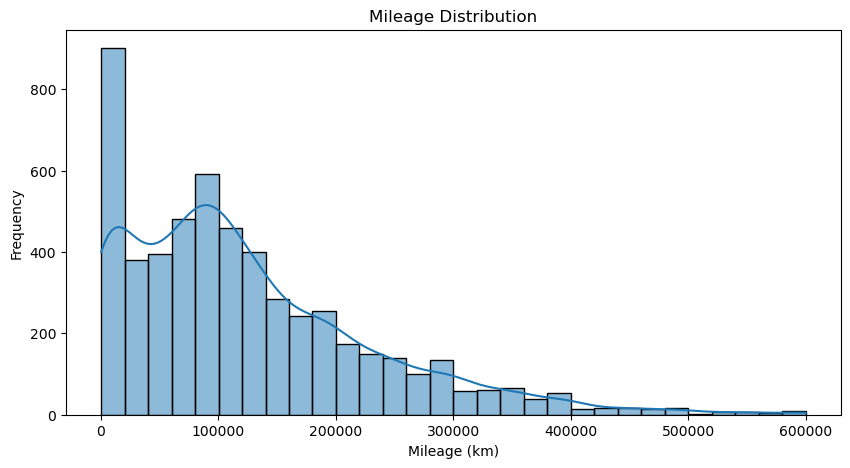

In [539]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cars['Mileage'], bins=30, kde=True)
plt.title('Mileage Distribution')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')
plt.show()

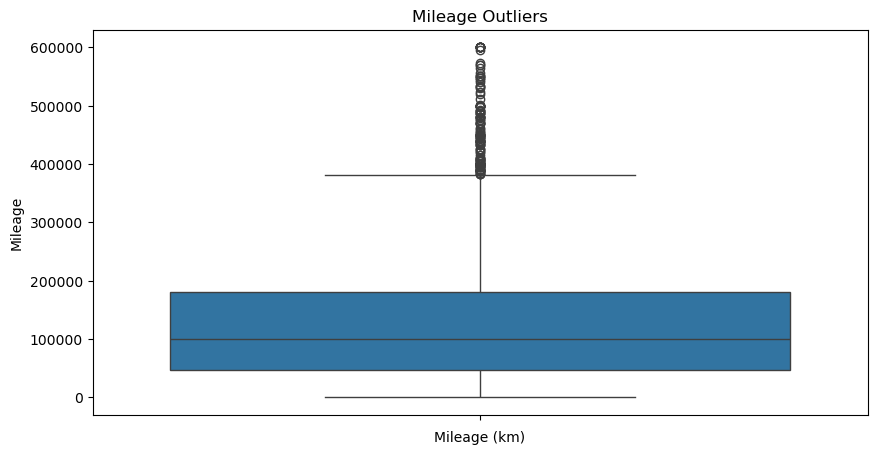

In [540]:
plt.figure(figsize=(10,5))
sns.boxplot(df_cars['Mileage'])
plt.title('Mileage Outliers')
plt.xlabel('Mileage (km)')
plt.show()

### Insights :
- The mileage distribution is right-skewed, meaning most cars have lower mileage, with a long tail extending towards higher mileage.
- The spread in higher mileage categories suggests that the dataset includes both low-mileage, nearly-new cars and well-used cars.
- There don’t appear to be extreme outliers beyond the max whisker, suggesting the dataset is relatively clean in this regard.

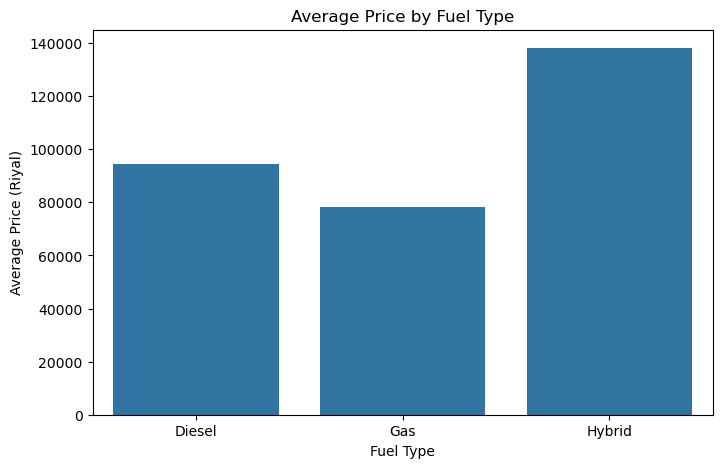

In [542]:
fuel_price_stats = df_cars.groupby('Fuel_Type')['Price'].agg(['mean', 'median', 'count']).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Fuel_Type', y='mean', data=fuel_price_stats)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (Riyal)')
plt.show()

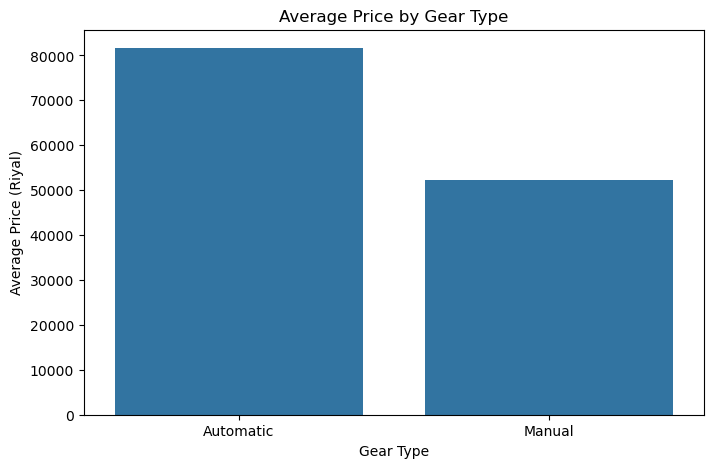

In [543]:
gear_price_stats = df_cars.groupby('Gear_Type')['Price'].agg(['mean', 'median', 'count']).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Gear_Type', y='mean', data=gear_price_stats)
plt.title('Average Price by Gear Type')
plt.xlabel('Gear Type')
plt.ylabel('Average Price (Riyal)')
plt.show()

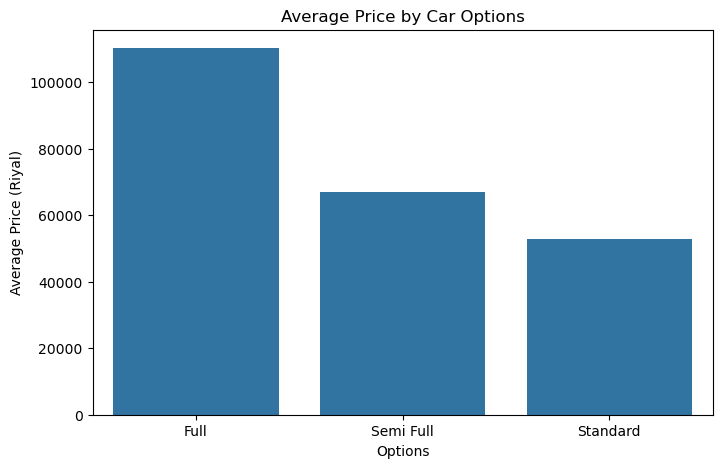

In [544]:
options_price_stats = df_cars.groupby('Options')['Price'].agg(['mean', 'median', 'count']).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Options', y='mean', data=options_price_stats)
plt.title('Average Price by Car Options')
plt.xlabel('Options')
plt.ylabel('Average Price (Riyal)')
plt.show()

### Insights :
- Hybrid and Diesel cars tend to retain higher value while Gasoline cars are more affordable, this making Fuel_Type an important factor in price prediction.
- Automatic cars dominate the higher-end market, while manual cars are more affordable.
- People looking for budget-friendly cars will likely go for Standard or Semi-Full, while luxury buyers opt for Full-option vehicles.

## 3. Feature Engineering

And we will create a new variable for the year of the car model to get the age of the car, we will name it Car_Age

In [548]:
df_cars['Car_Age'] = 2021 - df_cars['Year']
df_cars = df_cars.drop(columns=['Year'])

we will select the important features from what we got on EDA

In [550]:
Features_selected = df_cars[['Type','Make','Car_Age', 'Options','Engine_Size','Gear_Type', 'Mileage', 'Price']]

Turning the categorical features to numbers with One hot encode

In [552]:
cat_features = ['Type', 'Options', 'Gear_Type', 'Make']

# One-hot encode categorical features
dummies = pd.get_dummies(Features_selected[cat_features], drop_first=True)

Features_selected = pd.concat([Features_selected.drop(columns=cat_features), dummies], axis=1)

## 4. Bulding a model 

In [554]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
X = Features_selected.drop(columns=['Price'])  
y = Features_selected['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)


lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

print(f"🔹 **Linear Regression Performance**")
print(f"Train R² Score: {lr_train_r2:.3f} | Test R² Score: {lr_test_r2:.3f}")



🔹 **Linear Regression Performance**
Train R² Score: 0.737 | Test R² Score: 0.692


In [555]:
rf = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf.fit(X_train, y_train)


y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)


print("🔹 Random Forest:")
print(f"Training R²: {r2_score(y_train, y_train_pred_rf):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_rf):.4f}")

🔹 Random Forest:
Training R²: 0.9014
Test R²: 0.7476


In [556]:
xgb_reg  = xgb.XGBRegressor( max_depth=5,learning_rate=0.05,n_estimators=300,     subsample=0.8,  colsample_bytree=0.8, random_state=42)
xgb_reg.fit(X_train, y_train)


y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

print("🔹 XGBoost:")
print(f"Training R²: {r2_score(y_train, y_train_pred_xgb):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_xgb):.4f}")


🔹 XGBoost:
Training R²: 0.9365
Test R²: 0.8295


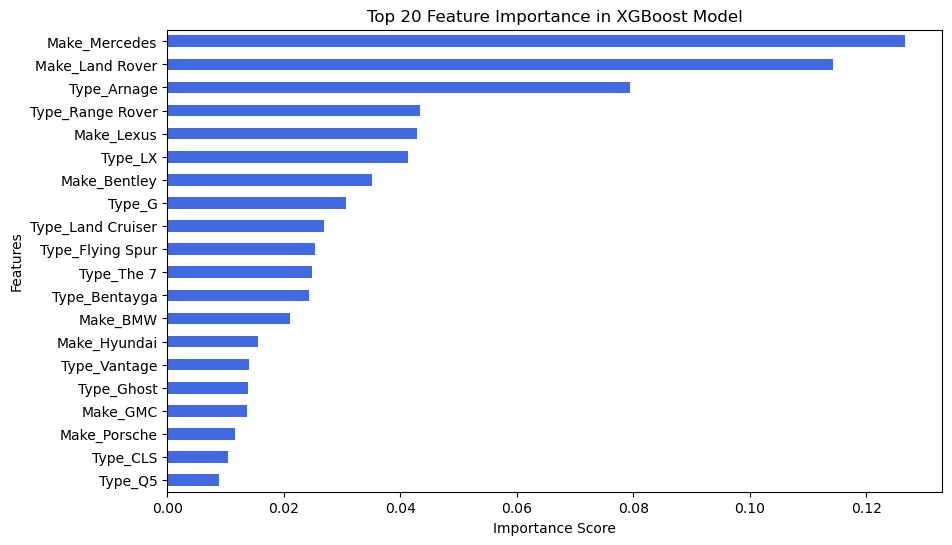

In [557]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)  # Make sure X_train and y_train are defined
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

top_features = feature_importances_xgb.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='royalblue')
plt.title("Top 20 Feature Importance in XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  
plt.show()

### Analysis : 

From the feature importance plot, we can see that "Make" and "Type" are the dominant factors influencing car prices.
These brands typically have higher resale values, justifying their impact.
- Luxury brands (Mercedes, Land Rover, Bentley, Lexus, BMW) and premium models (Range Rover, Land Cruiser, Flying Spur) dominate.
- Higher engine size correlates with price, but categorical features have a stronger influence.
- XGBoost performed the best (Train R²: 0.93, Test R²: 0.82).

## Conclusion 

This report summarizes the analysis conducted, from EDA to modeling, ensuring the best insights for used car price prediction in Saudi Arabia, this dataset taken from Kaggle.
- Car brand and model dominate pricing, while numerical factors (mileage, engine size) play secondary roles.
-  XGBoost is the best model, achieving an 82% accuracy in predicting used car prices.
- Mileage & Car Age – Affect price but are less significant than brand/model.
- Region: Riyadh, Jeddah, and Dammam have the highest average prices.
-Fuel Type: Hybrid and Diesel cars tend to have higher prices than gasoline cars.
- Options (Trims): Full-option cars are much more expensive than Standard versions.
- Transmission Type: Automatic cars are priced significantly higher than manual ones but not much.